[Reference](https://medium.com/analytics-vidhya/all-about-it-time-aeries-analysis-exponential-smoothing-example-e62057768bc1)

In [3]:
!pip install yfinance

     |████████████████████████████████| 6.4 MB 7.4 MB/s 
     |████████████████████████████████| 63 kB 1.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [62]:
pip install statsmodels==0.12.0

     |████████████████████████████████| 9.5 MB 4.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


[*********************100%***********************]  1 of 1 completed


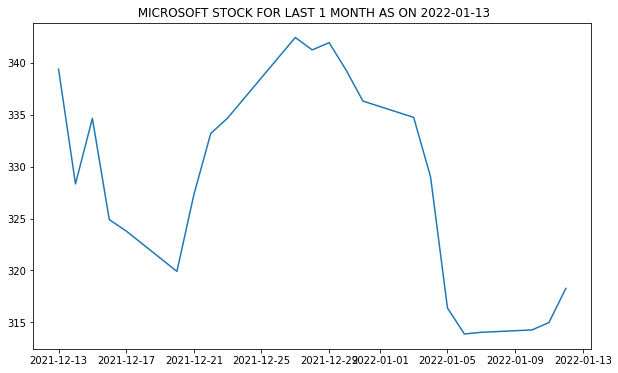

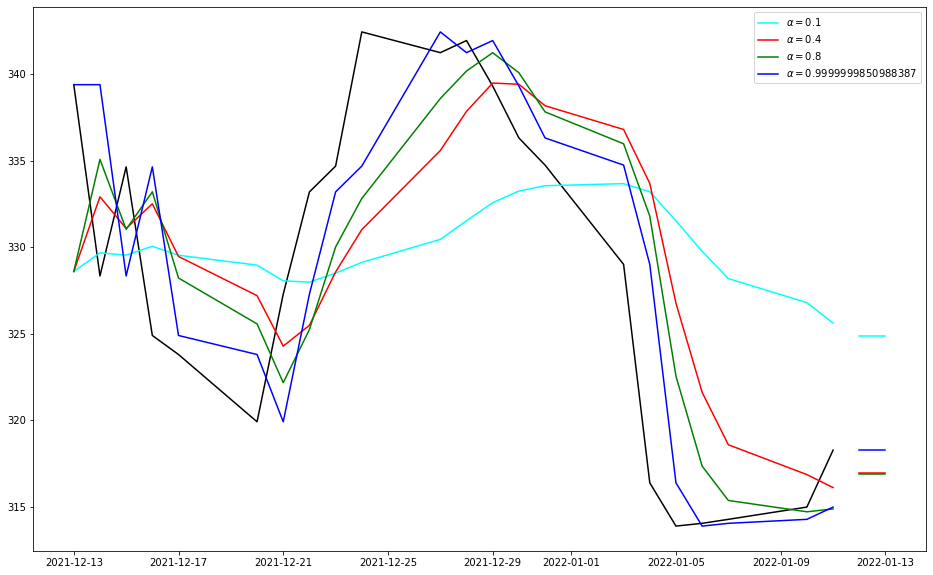

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime 
import matplotlib.pyplot as plt
from statsmodels.tsa.api import SimpleExpSmoothing

data = yf.download(tickers='MSFT', period='1mo', interval='1d')
data.head(3)
today = datetime.date.today()
plt.figure(figsize=(10,6))
plt.title(' MICROSOFT STOCK FOR LAST 1 MONTH AS ON '+ str(today))
plt.plot(data['Close'])
plt.show()
data = data['Close'].tolist()
index = pd.date_range(start='12/13/2021', end='1/11/2022', freq='B')#CHANGE DATA FOR 30 DAYS FROM THE DATE WHEN YOU ARE RUNNING THIS CODE
stock_data = pd.Series(data, index=index)
forecast_timestep = 2
fit_1 = SimpleExpSmoothing(stock_data, initialization_method="heuristic").fit(smoothing_level=0.1,optimized=False)
forecast1 = fit_1.forecast(forecast_timestep).rename(r'$\alpha=0.1$')
fit_2 = SimpleExpSmoothing(stock_data, initialization_method="heuristic").fit(smoothing_level=0.4,optimized=False)
forecast2 = fit_2.forecast(forecast_timestep).rename(r'$\alpha=0.4$')
fit_3 = SimpleExpSmoothing(stock_data, initialization_method="heuristic").fit(smoothing_level=0.6,optimized=False)
forecast3 = fit_3.forecast(forecast_timestep).rename(r'$\alpha=0.8$')
fit_4 = SimpleExpSmoothing(stock_data, initialization_method="estimated").fit()
forecast4 = fit_4.forecast(forecast_timestep).rename(r'$\alpha=%s$'%fit_4.model.params['smoothing_level'])
plt.figure(figsize=(16,10))
plt.plot(stock_data, color='black')
plt.plot(fit_1.fittedvalues, color='cyan')
line1, = plt.plot(forecast1, color='cyan')
plt.plot(fit_2.fittedvalues, color='red')
line2, = plt.plot(forecast2, color='red')
plt.plot(fit_3.fittedvalues, color='green')
line3, = plt.plot(forecast3, color='green')
plt.plot(fit_4.fittedvalues, color='blue')
line4, = plt.plot(forecast4, color='blue')
plt.legend([line1, line2, line3,line4], [forecast1.name, forecast2.name, forecast3.name,forecast4.name])
plt.show()